# Assignment 3 DD2358
 Group 17: Felix Schätzle, Georgios Mitsos, Thorben Fetz

## Exerice 1: Cythonize the STREAM Benchmark

## Task 1.1
Cython version of the STREAM benchmark with ctypes

In [5]:
from timeit import default_timer as timer
import numpy as np
import array
import matplotlib.pyplot as plt
from functools import wraps
import cythonfn


In [6]:
STREAM_ARRAY_SIZE_VECTOR = [10, 100, 1000, 5000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000]

scalar = 2.0

nob = 8 # number of bytes

times = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(4)]
data_kernel = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(4)]
bw = [[0] * len(STREAM_ARRAY_SIZE_VECTOR) for _ in range(4)]

In [7]:
for i in range(len(STREAM_ARRAY_SIZE_VECTOR)):

    # ARRAYS
    a = array.array('f',[1.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    b = array.array('f',[2.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    c = array.array('f',[0.0]*STREAM_ARRAY_SIZE_VECTOR[i])
    
    # copy
    times[0][i] = timer()
    cythonfn.copy(STREAM_ARRAY_SIZE_VECTOR[i], c, a)
    times[0][i] = timer() - times[0][i]

    # scale
    times[1][i] = timer()
    cythonfn.scale(STREAM_ARRAY_SIZE_VECTOR[i], b, scalar, c)
    times[1][i] = timer() - times[1][i]

    #sum
    times[2][i] = timer()
    cythonfn.sum(STREAM_ARRAY_SIZE_VECTOR[i], c, a, b)
    times[2][i] = timer() - times[2][i]

    # triad
    times[3][i] = timer()
    cythonfn.triad(STREAM_ARRAY_SIZE_VECTOR[i], a, b, scalar, c)
    times[3][i] = timer() - times[3][i]

    data_kernel[0][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[1][i] = 2 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[2][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6
    data_kernel[3][i] = 3 * nob * STREAM_ARRAY_SIZE_VECTOR[i] / 1e6


    for j in range(4):
        bw[j][i] = data_kernel[j][i]/times[j][i]

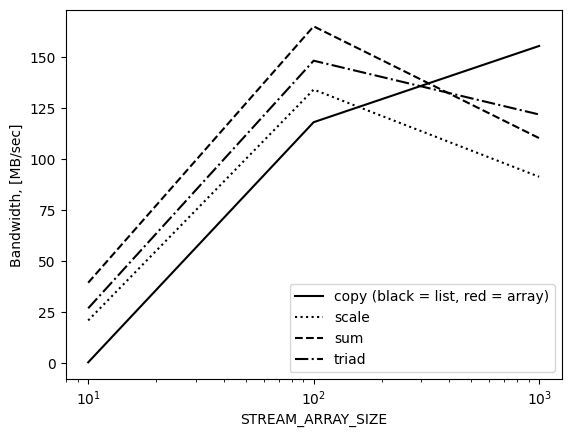

In [8]:
# plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[j], label=f'CPU {i}')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[0], linestyle='solid', linewidth=1.5, color='black', label=f'copy (black = list, red = array)')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[1], linestyle='dotted', linewidth=1.5, color='black', label=f'scale')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[2], linestyle='dashed', linewidth=1.5, color='black', label=f'sum')
plt.plot(STREAM_ARRAY_SIZE_VECTOR, bw[3], linestyle='dashdot', linewidth=1.5, color='black', label=f'triad')
plt.xscale("log")
plt.xlabel('STREAM_ARRAY_SIZE')
plt.ylabel('Bandwidth, [MB/sec]')
plt.legend()
plt.show()